In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=39bb7552c9886023110fb1d2c08bb9a750e44a58a44e98353f5bb85119fac729
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [ ]:
input_file_path='/content/drive/MyDrive/class/capstone_com/dataset_new/fake_pr 시험'
output_file_path='/content/drive/MyDrive/class/capstone_com/dataset_new/real_pr 시험'
meta_data_path='/content/drive/MyDrive/class/capstone_com/dataset_new/'
checkpoint_path='/content/drive/MyDrive/class/capstone_com/dataset_new/checkpoints'
frames=100

In [ ]:
!pip install openpyxl

In [ ]:
import os
import pandas as pd

# 정리할 폴더 경로 지정
folder_path = f'{input_file_path}'

# 폴더 내 파일 목록 가져오기 (확장자 포함)
file_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# pandas DataFrame으로 정리
df = pd.DataFrame(file_list, columns=["Filename"])

# 저장할 엑셀 경로 지정
output_excel_path = '/content/drive/MyDrive/class/capstone_com/dataset_new/file_list.xlsx'

# 엑셀로 저장
df.to_excel(output_excel_path, index=False, engine='openpyxl')

print(f"✅ 파일 목록이 엑셀로 저장되었습니다: {output_excel_path}")


✅ 파일 목록이 엑셀로 저장되었습니다: /content/drive/MyDrive/class/capstone_com/dataset_new/file_list.xlsx


In [ ]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil =  glob.glob(f'{input_file_path}/*.mp4')   # 경로 변경
video_fil += glob.glob(f'{output_file_path}/*.mp4')
# video_fil += glob.glob('/content/drive/My Drive/DFDC_FAKE_Face_only_data/*.mp4')
# video_fil += glob.glob('/content/drive/My Drive/DFDC_REAL_Face_only_data/*.mp4')
# video_fil += glob.glob('/content/drive/My Drive/FF_Face_only_data/*.mp4')
print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 188
['/content/drive/MyDrive/class/capstone_com/dataset_new/fake_pr 시험/bgwmmwgmgk.mp4', '/content/drive/MyDrive/class/capstone_com/dataset_new/fake_pr 시험/bgdokxsepy.mp4', '/content/drive/MyDrive/class/capstone_com/dataset_new/fake_pr 시험/bdhbzwfiov.mp4', '/content/drive/MyDrive/class/capstone_com/dataset_new/fake_pr 시험/bfowhabcyv.mp4', '/content/drive/MyDrive/class/capstone_com/dataset_new/fake_pr 시험/bftgduqoct.mp4', '/content/drive/MyDrive/class/capstone_com/dataset_new/fake_pr 시험/bgqvaldacu.mp4', '/content/drive/MyDrive/class/capstone_com/dataset_new/fake_pr 시험/bhneimyaiz.mp4', '/content/drive/MyDrive/class/capstone_com/dataset_new/fake_pr 시험/bidlydtbkf.mp4', '/content/drive/MyDrive/class/capstone_com/dataset_new/fake_pr 시험/bihlajjbnl.mp4', '/content/drive/MyDrive/class/capstone_com/dataset_new/fake_pr 시험/bgswtwkxvc.mp4', '/content/drive/MyDrive/class/capstone_com/dataset_new/fake_pr 시험/bjorshdgjo.mp4', '/content/drive/MyDrive/clas

In [ ]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob(f'{input_file_path}/*.mp4')   # 경로 변경
video_files += glob.glob(f'{output_file_path}/*.mp4')
# video_files += glob.glob('/content/drive/My Drive/DFDC_FAKE_Face_only_data/*.mp4')
# video_files += glob.glob('/content/drive/My Drive/DFDC_REAL_Face_only_data/*.mp4')
# video_files += glob.glob('/content/drive/My Drive/FF_Face_only_data/*.mp4')
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<frames):  # frames 변수 위에서 조정
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [124, 148, 148, 134, 124, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 116, 148, 148, 148, 148, 148, 148, 148, 148, 115, 128, 148, 148, 148, 148, 148, 148, 120, 148, 148, 148, 148, 146, 124, 148, 148, 148, 148, 148, 148, 148, 146, 148, 128, 148, 148, 148, 148, 148, 104, 148, 128, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 144, 104, 148, 148, 148, 148, 148, 148, 148, 144, 148, 148, 148, 148, 148, 148, 148, 148, 132, 148, 148, 148, 148, 148, 148, 148, 148, 148, 124, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 104, 148, 148, 148, 104, 148, 140, 148, 148, 148, 148, 148, 148, 148, 104, 148, 124, 148, 148, 148, 148, 148, 148, 148, 148, 104, 148, 104, 148, 104, 148, 132, 148, 148, 148, 148, 148, 148, 148, 148, 148, 104, 148, 148, 148, 148, 148, 148, 104, 148, 148, 148, 104, 148, 148]
Total no of video:  172
Average frame per video: 143.21511627906978


In [ ]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv(f'{meta_data_path}/global_metadata.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

train :  144
test :  36
TRAIN:  Real: 75  Fake: 69
TEST:  Real: 16  Fake: 20


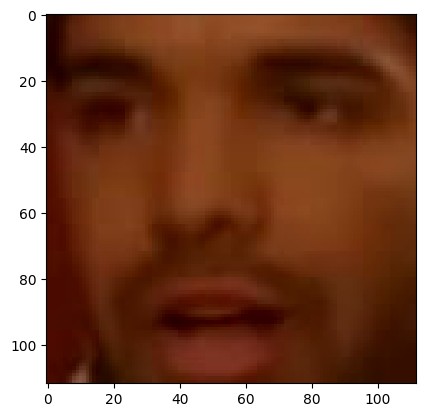

In [ ]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv(f'{meta_data_path}/global_metadata.csv',names=header_list)
#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
# cpu사용하기 때문에 병렬처리 뻄
# train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
# valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 0)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 0)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [ ]:
from torch import nn
from torchvision import models

class Model(nn.Module):
    def __init__(self, num_classes, latent_dim=1280, lstm_layers=1, hidden_dim=2048, bidirectional=False):
        super(Model, self).__init__()
        model = models.efficientnet_b0(pretrained=True)
        self.model = model.features
        self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        # Change the input size of the linear layer to match the hidden_dim of the LSTM
        self.linear1 = nn.Linear(hidden_dim, num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size, seq_length, -1)  # -1은 latent_dim을 자동으로 잡아줌
        x_lstm, _ = self.lstm(x, None)
        return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))

In [ ]:
import torch
print(torch.cuda.is_available())   # cuda를 사용 못하고 있음

True


In [ ]:
# model = Model(2).cuda()
# a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))
# cuda 사용 안되서 cpu작동으로 바꿈
model = Model(2).cpu()
a, b = model(torch.from_numpy(np.empty((1, 20, 3, 112, 112))).type(torch.FloatTensor))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        # GPU에서 실행 안함
        # if torch.cuda.is_available():
        #     targets = targets.type(torch.cuda.LongTensor)
        #     inputs = inputs.cuda()

        _,outputs = model(inputs)
        loss = criterion(outputs, targets)
        acc = calculate_accuracy(outputs, targets)
        # loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        # acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    # torch.save(model.state_dict(),'/content/checkpoint.pt')
    torch.save(model.state_dict(), f'{checkpoint_path}/checkpoint.pt')

    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            # if torch.cuda.is_available():
                # targets = targets.cuda().type(torch.cuda.FloatTensor)
                # inputs = inputs.cuda()
            #  GPu 안되서 바꿈
            inputs = inputs.cpu()  # inputs를 CPU로
            targets = targets.cpu()  # targets를 CPU로
            #

            _,outputs = model(inputs)
            # GPu 안되서 바꿈
            # loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            # acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            loss = torch.mean(criterion(outputs, targets))
            acc = calculate_accuracy(outputs, targets)
            #
            _,p = torch.max(outputs,1)
            # true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            true += (targets.type(torch.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()

            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size



In [ ]:
!pip install seaborn

In [ ]:
#Output confusion matrix   성능 평가
import seaborn as sn
from sklearn.metrics import confusion_matrix  #내가 추가함
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)


    y_true = (['Fake'] * sum(cm[0]) + ['Real'] * sum(cm[1]))
    y_pred = (['Fake'] * cm[0][0] + ['Real'] * cm[0][1] +
            ['Fake'] * cm[1][0] + ['Real'] * cm[1][1])

    # 성능 출력
    print("📊 Confusion Matrix:\n", cm)
    print("\n📈 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Fake', 'Real']))

In [ ]:
# loss 그래프
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

[Epoch 1/20] [Batch 35 / 36] [Loss: 0.708801, Acc: 53.47%]Testing
[Batch 8 / 9]  [Loss: 0.927180, Acc: 55.56%]
Accuracy 55.55555555555556
[Epoch 2/20] [Batch 35 / 36] [Loss: 0.671668, Acc: 54.86%]Testing
[Batch 8 / 9]  [Loss: 0.766567, Acc: 44.44%]
Accuracy 44.44444444444444
[Epoch 3/20] [Batch 35 / 36] [Loss: 0.575409, Acc: 70.83%]Testing
[Batch 8 / 9]  [Loss: 1.369926, Acc: 55.56%]
Accuracy 55.55555555555556
[Epoch 4/20] [Batch 35 / 36] [Loss: 0.567004, Acc: 72.22%]Testing
[Batch 8 / 9]  [Loss: 0.731288, Acc: 44.44%]
Accuracy 44.44444444444444
[Epoch 5/20] [Batch 35 / 36] [Loss: 0.484050, Acc: 74.31%]Testing
[Batch 8 / 9]  [Loss: 1.313873, Acc: 44.44%]
Accuracy 44.44444444444444
[Epoch 6/20] [Batch 35 / 36] [Loss: 0.425190, Acc: 78.47%]Testing
[Batch 8 / 9]  [Loss: 2.697704, Acc: 55.56%]
Accuracy 55.55555555555556
[Epoch 7/20] [Batch 35 / 36] [Loss: 0.471735, Acc: 79.17%]Testing
[Batch 8 / 9]  [Loss: 1.805730, Acc: 44.44%]
Accuracy 44.44444444444444
[Epoch 8/20] [Batch 35 / 36] [Loss

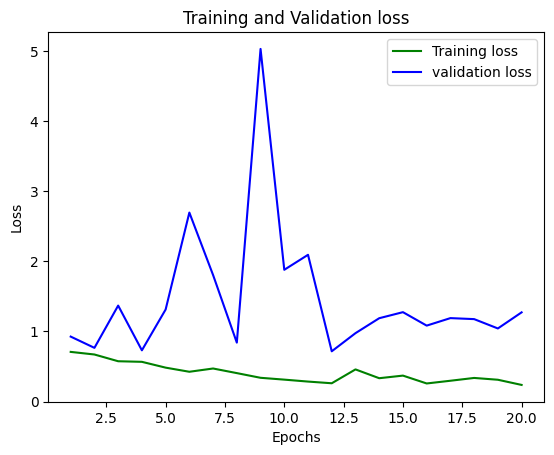

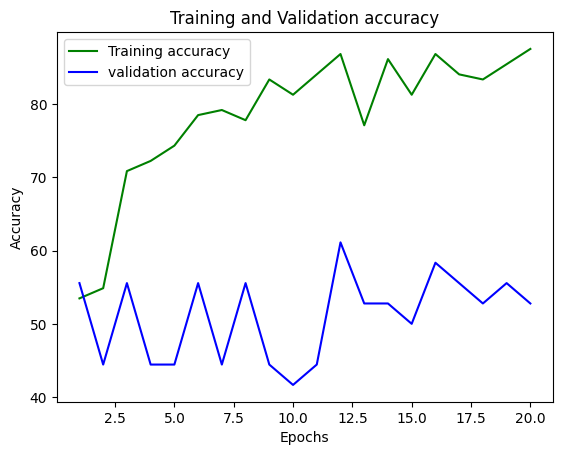

[[13  7]
 [10  6]]


In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-4              #시작 1e-5#0.001
#number of epochs
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()

#GPU안되서 수정
# criterion = nn.CrossEntropyLoss().cuda()
criterion = nn.CrossEntropyLoss().cpu()
#
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))


[[13  7]
 [10  6]]
True positive =  13
False positive =  7
False negative =  10
True negative =  6




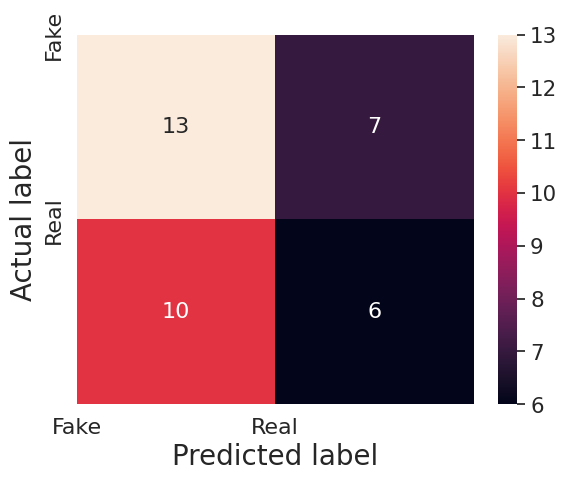

Calculated Accuracy 52.77777777777778
📊 Confusion Matrix:
 [[13  7]
 [10  6]]

📈 Classification Report:
              precision    recall  f1-score   support

        Fake       0.57      0.65      0.60        20
        Real       0.46      0.38      0.41        16

    accuracy                           0.53        36
   macro avg       0.51      0.51      0.51        36
weighted avg       0.52      0.53      0.52        36



In [ ]:
print_confusion_matrix(true,pred)